Importing essential library

In [28]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Training the data

In [22]:
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
y_train.shape

(60000,)

In [25]:
X_train[0].shape

(28, 28)

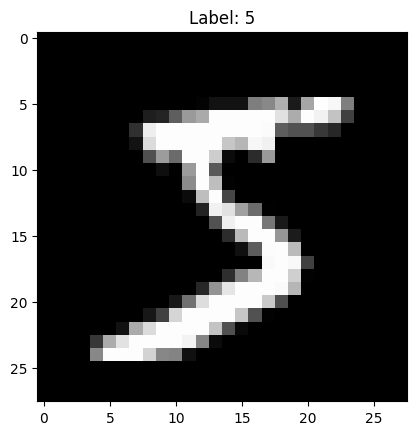

In [26]:
plt.imshow(X_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()

Normalising pixels to [0,1]

In [ ]:
X_train=X_train/255
X_test=X_test/255


Reshaping to apply cnn Sequential

In [ ]:

X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [31]:
cnn=Sequential([
    layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(10,activation="softmax")
])

c:\Users\rawat\digit\library\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling

In [32]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Training the model till 5 epochs

In [33]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9142 - loss: 0.2826
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9867 - loss: 0.0426
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9908 - loss: 0.0275
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9944 - loss: 0.0181
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9945 - loss: 0.0160


Evaluating the result

In [34]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.0518


[0.037542279809713364, 0.9886000156402588]

Predicting the data

In [35]:
y_pred = cnn.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[8.6031932e-11, 6.8788641e-10, 1.5972183e-06, ..., 9.9999738e-01,
        2.7631868e-09, 1.5491104e-07],
       [7.5522735e-06, 7.8892570e-10, 9.9999154e-01, ..., 3.0850934e-12,
        3.4403236e-09, 9.0056131e-12],
       [7.0621633e-07, 9.9986935e-01, 3.0902436e-06, ..., 5.8014091e-05,
        1.5175619e-05, 6.9891314e-07],
       ...,
       [1.1134592e-15, 1.4445412e-12, 1.3047044e-14, ..., 3.5286876e-10,
        3.3422660e-09, 2.1603919e-09],
       [1.8553704e-10, 9.3718029e-14, 4.9541390e-15, ..., 2.2893196e-11,
        1.7508255e-07, 2.3081597e-11],
       [4.8684978e-08, 1.8775871e-10, 4.8457154e-09, ..., 6.2714309e-13,
        2.0388816e-08, 4.8100916e-11]], dtype=float32)

In [40]:
y_pred[:5]
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

Text(0.5, 1.0, 'Label: 6')

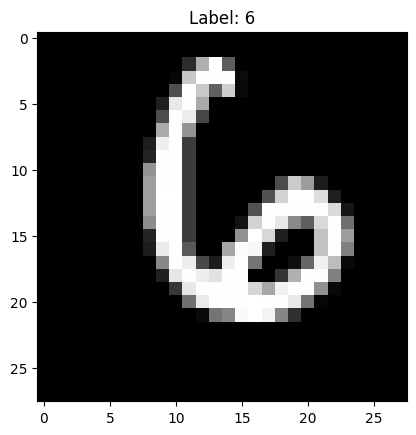

In [44]:
plt.imshow(X_test[88].reshape(28,28), cmap="gray")
plt.title(f"Label: {y_classes[88]}")



In [45]:
cnn.save("mnist.h5")